## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from joblib import dump
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

## Load dataset

In [2]:
file_path = 'D:/Bimar-backend/AI/archive/Final_Augmented_dataset_Diseases_and_Symptoms.csv'

df = pd.read_csv(file_path)
print('Data Preview:')
df.head(20)

Data Preview:


,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,panic disorder,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,panic disorder,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,panic disorder,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,panic disorder,1,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,panic disorder,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Dataframe shape

In [3]:
df.shape

(246945, 378)

### Check for duplicates

In [4]:
df.duplicated().value_counts()

False    189647
True      57298
Name: count, dtype: int64

### Remove duplicated rows and columns

In [5]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

np.int64(0)

In [6]:
df.columns

Index(['diseases', 'anxiety and nervousness', 'depression',
       'shortness of breath', 'depressive or psychotic symptoms',
       'sharp chest pain', 'dizziness', 'insomnia',
       'abnormal involuntary movements', 'chest tightness',
       ...
       'stuttering or stammering', 'problems with orgasm', 'nose deformity',
       'lump over jaw', 'sore in nose', 'hip weakness', 'back swelling',
       'ankle stiffness or tightness', 'ankle weakness', 'neck weakness'],
      dtype='object', length=378)

### Replace spaces with underscores in column names

In [7]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['diseases', 'anxiety_and_nervousness', 'depression',
       'shortness_of_breath', 'depressive_or_psychotic_symptoms',
       'sharp_chest_pain', 'dizziness', 'insomnia',
       'abnormal_involuntary_movements', 'chest_tightness',
       ...
       'stuttering_or_stammering', 'problems_with_orgasm', 'nose_deformity',
       'lump_over_jaw', 'sore_in_nose', 'hip_weakness', 'back_swelling',
       'ankle_stiffness_or_tightness', 'ankle_weakness', 'neck_weakness'],
      dtype='object', length=378)

## Plot Most Frequent Diseases

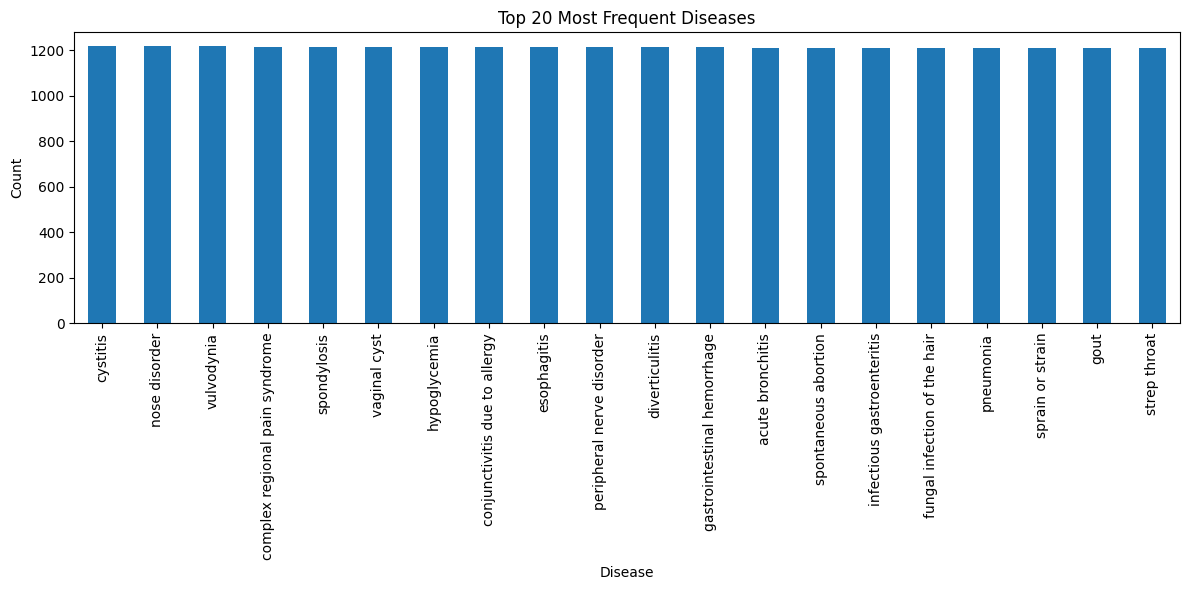

In [8]:
plt.figure(figsize=(12, 6))

df['diseases'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Most Frequent Diseases")
plt.xlabel("Disease")
plt.ylabel("Count")

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## Text Column Encoding.

In [9]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['diseases'])
# Check result
print(df[['diseases', 'label']].head(10))

         diseases  label
0  panic disorder    531
1  panic disorder    531
2  panic disorder    531
3  panic disorder    531
4  panic disorder    531
5  panic disorder    531
6  panic disorder    531
7  panic disorder    531
8  panic disorder    531
9  panic disorder    531


## Barplot: Most Common Symptoms for a Specific Disease

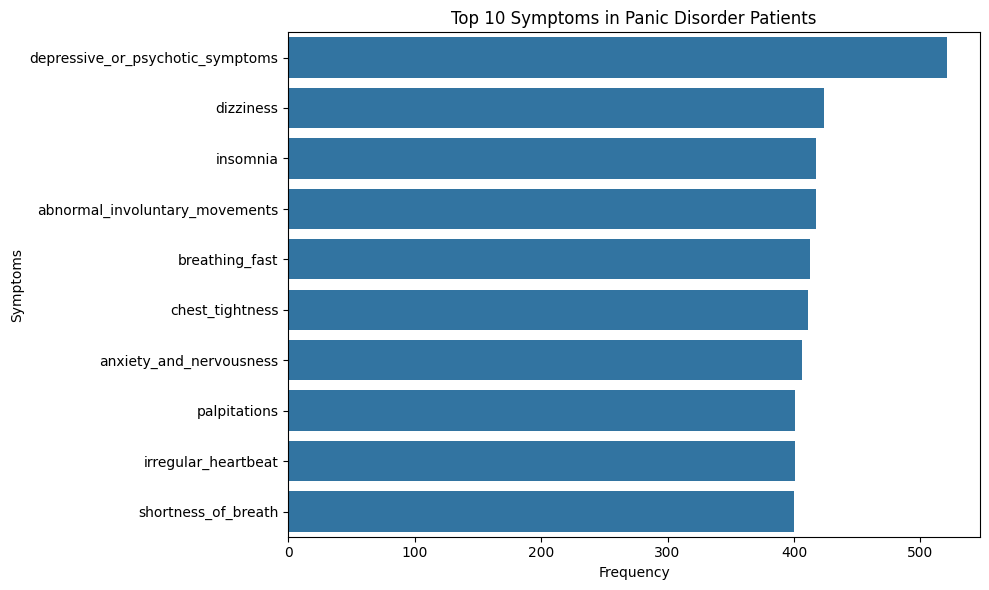

In [10]:
# Filter panic disorder cases
panic_df = df[df['label'] == 531]

# Select only numeric columns (binary symptoms)
numeric_panic_df = panic_df.select_dtypes(include='number')

# Drop the 'label' column if it's numeric and not part of symptoms
numeric_panic_df = numeric_panic_df.drop(columns=['label'])

# Sum binary symptom values and sort the top 10
symptom_sums = numeric_panic_df.sum().sort_values(ascending=False)[:10]

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=symptom_sums.values, y=symptom_sums.index)
plt.title("Top 10 Symptoms in Panic Disorder Patients")
plt.xlabel("Frequency")
plt.ylabel("Symptoms")

plt.tight_layout()
plt.show()

## Split features and target

In [11]:
# Remove the diseases column
df = df.drop(["diseases"], axis=1).copy()
df.head()

X = df.drop(["label"], axis=1)
y = df["label"]

In [12]:
X.shape, y.shape

((189647, 377), (189647,))

In [13]:
X.head()
X.columns
dump(list(X.columns), "symptom_columns.pkl")


['symptom_columns.pkl']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((151717, 377), (37930, 377), (37930,), (151717,))

## model creation and training

In [15]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.834748220406011
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.87      0.96      0.91        49
           2       0.79      0.76      0.77        29
           3       0.00      0.00      0.00         1
           4       0.63      0.88      0.73        25
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.82      0.74      0.78        82
           9       0.95      0.70      0.80       155
          10       0.89      0.93      0.91       238
          11       0.90      0.64      0.74       247
          12       0.72      0.82      0.77       166
          14       0.27      0.20      0.23        30
          15       0.98      0.92      0.95       168
          16       0.69      0.83      0.75       108
          17       0.88      0.88

C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: Un

## Create and train LinearSVC model

In [16]:
print("\nTraining Linear SVC model...")
svc_model = LinearSVC(max_iter=1000)
svc_model.fit(x_train, y_train)

# Predict and evaluate
svc_preds = svc_model.predict(x_test)
svc_accuracy = accuracy_score(y_test, svc_preds)
print(f"Linear SVC Accuracy: {svc_accuracy:.4f}")
print(classification_report(y_test, svc_preds))


Training Linear SVC model...
Linear SVC Accuracy: 0.8308
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.94      0.96      0.95        49
           2       0.73      0.76      0.75        29
           3       1.00      1.00      1.00         1
           4       0.75      0.84      0.79        25
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         4
           8       0.80      0.65      0.72        82
           9       0.96      0.69      0.80       155
          10       0.92      0.93      0.93       238
          11       0.77      0.64      0.70       247
          12       0.68      0.81      0.74       166
          14       0.33      0.27      0.30        30
          15       0.97      0.92      0.95       168
          16       0.72      0.81      0.76       108
          17       0.77

C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: Un

### Create and train K-Nearest Neighbors model

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # 5 is a common starting point
knn_model.fit(x_train, y_train)

# Predict and evaluate
knn_preds = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_preds)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")
print(classification_report(y_test, knn_preds))


K-Nearest Neighbors Accuracy: 0.7896
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.91      0.98      0.94        49
           2       0.38      0.79      0.51        29
           3       1.00      1.00      1.00         1
           4       0.42      0.88      0.57        25
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         1
           7       0.06      0.25      0.10         4
           8       0.44      0.73      0.55        82
           9       0.44      0.72      0.55       155
          10       0.80      0.92      0.86       238
          11       0.62      0.67      0.64       247
          12       0.57      0.68      0.62       166
          14       0.14      0.30      0.19        30
          15       0.86      0.92      0.89       168
          16       0.57      0.75      0.65       108
          17       0.75      0.90      0.82 

C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: Un

## Create DataFrame for All Models wrong predictions

### Linear Regression

In [18]:
# Create a DataFrame showing misclassified instances by Logistic Regression
lr_wrong = pd.DataFrame({
    'Actual': y_test[y_test != y_pred],
    'Predicted': y_pred[y_test != y_pred],
    'Confidence': np.max(lr.predict_proba(x_test[y_test != y_pred]), axis=1)
})

# Map numeric labels back to original disease names
lr_wrong['Actual_Disease'] = le.inverse_transform(lr_wrong['Actual'])
lr_wrong['Predicted_Disease'] = le.inverse_transform(lr_wrong['Predicted'])

print("Logistic Regression - Misclassifications Sample:")
print(f"Total misclassifications: {len(lr_wrong)}")
lr_wrong.head()

Logistic Regression - Misclassifications Sample:
Total misclassifications: 6268


,Actual,Predicted,Confidence,Actual_Disease,Predicted_Disease
155695,339,323,0.354578,hyperemesis gravidarum,hiatal hernia
117249,18,10,0.300612,acute respiratory distress syndrome (ards),acute bronchiolitis
2113,745,743,0.203638,vaginitis,vaginal yeast infection
170401,550,477,0.221980,personality disorder,neurosis
118253,692,672,0.370563,tendinitis,sprain or strain


### SVM 

In [19]:
# Create a DataFrame showing misclassified instances by SVM
svc_wrong_indices = np.where(y_test != svc_preds)[0]
svc_wrong = pd.DataFrame({
    'Actual': y_test.iloc[svc_wrong_indices],
    'Predicted': svc_preds[svc_wrong_indices]
})

# Map numeric labels back to original disease names
svc_wrong['Actual_Disease'] = le.inverse_transform(svc_wrong['Actual'])
svc_wrong['Predicted_Disease'] = le.inverse_transform(svc_wrong['Predicted'])

print("\nLinear SVC - Misclassifications Sample:")
print(f"Total misclassifications: {len(svc_wrong)}")
svc_wrong.head()


Linear SVC - Misclassifications Sample:
Total misclassifications: 6417


,Actual,Predicted,Actual_Disease,Predicted_Disease
155695,339,323,hyperemesis gravidarum,hiatal hernia
117249,18,10,acute respiratory distress syndrome (ards),acute bronchiolitis
2113,745,63,vaginitis,atrophic vaginitis
170401,550,477,personality disorder,neurosis
118253,692,672,tendinitis,sprain or strain


### K-Nearest Neighbor

In [20]:
# Create a DataFrame showing misclassified instances by SVM
svc_wrong_indices = np.where(y_test != svc_preds)[0]
svc_wrong = pd.DataFrame({
    'Actual': y_test.iloc[svc_wrong_indices],
    'Predicted': svc_preds[svc_wrong_indices]
})

# Map numeric labels back to original disease names
svc_wrong['Actual_Disease'] = le.inverse_transform(svc_wrong['Actual'])
svc_wrong['Predicted_Disease'] = le.inverse_transform(svc_wrong['Predicted'])

print("\nLinear SVC - Misclassifications Sample:")
print(f"Total misclassifications: {len(svc_wrong)}")
svc_wrong.head()


Linear SVC - Misclassifications Sample:
Total misclassifications: 6417


,Actual,Predicted,Actual_Disease,Predicted_Disease
155695,339,323,hyperemesis gravidarum,hiatal hernia
117249,18,10,acute respiratory distress syndrome (ards),acute bronchiolitis
2113,745,63,vaginitis,atrophic vaginitis
170401,550,477,personality disorder,neurosis
118253,692,672,tendinitis,sprain or strain


## Models Performance Plot.

C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:

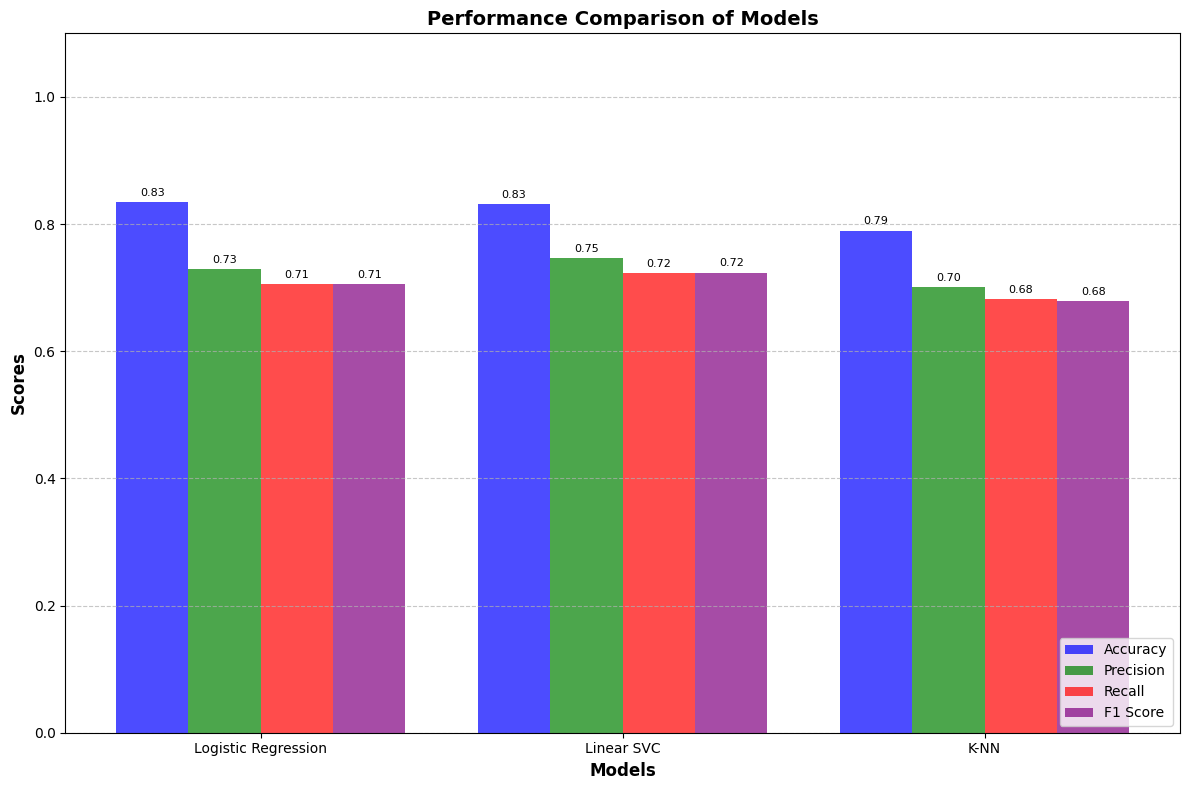

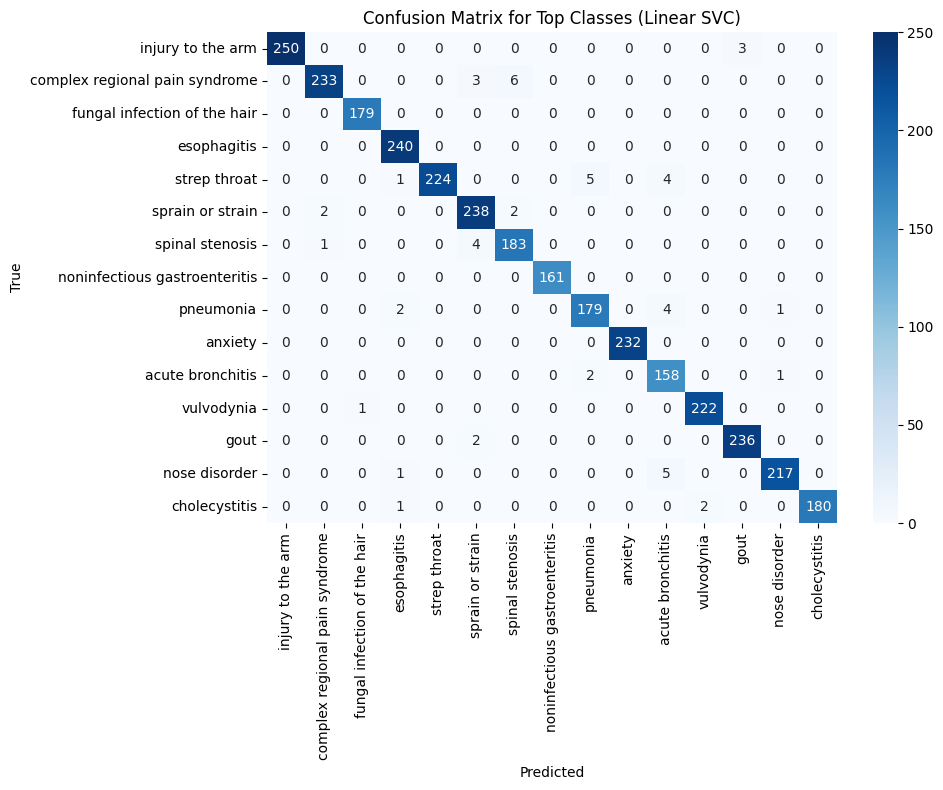

Models saved successfully!


In [21]:
# Collect metrics for all models
models = ['Logistic Regression', 'Linear SVC', 'K-NN']
accuracies = [accuracy_score(y_test, y_pred), svc_accuracy, knn_accuracy]
precisions = [precision_score(y_test, y_pred, average='macro'), 
              precision_score(y_test, svc_preds, average='macro'),
              precision_score(y_test, knn_preds, average='macro')]
recalls = [recall_score(y_test, y_pred, average='macro'),
           recall_score(y_test, svc_preds, average='macro'),
           recall_score(y_test, knn_preds, average='macro')]
f1_scores = [f1_score(y_test, y_pred, average='macro'),
             f1_score(y_test, svc_preds, average='macro'),
             f1_score(y_test, knn_preds, average='macro')]

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bars
barWidth = 0.2
 
# Set positions of bars on X axis
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Create bars
ax.bar(r1, accuracies, width=barWidth, label='Accuracy', color='blue', alpha=0.7)
ax.bar(r2, precisions, width=barWidth, label='Precision', color='green', alpha=0.7)
ax.bar(r3, recalls, width=barWidth, label='Recall', color='red', alpha=0.7)
ax.bar(r4, f1_scores, width=barWidth, label='F1 Score', color='purple', alpha=0.7)
 
# Add x-axis labels
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('Scores', fontweight='bold', fontsize=12)
plt.title('Performance Comparison of Models', fontweight='bold', fontsize=14)
plt.xticks([r + barWidth*1.5 for r in range(len(models))], models)

# Add a horizontal grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend(loc='lower right')

# Add value labels on top of each bar
for i, bars in enumerate([r1, r2, r3, r4]):
    values = [accuracies, precisions, recalls, f1_scores][i]
    for j, bar in enumerate(bars):
        plt.text(bar, values[j] + 0.01, f'{values[j]:.2f}', ha='center', fontsize=8)

plt.ylim(0, 1.1)  # Set y-axis limit
plt.tight_layout()
plt.show()

# Create a confusion matrix visualization for the best performing model
# (assuming Linear SVC is the best based on previous results)
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, svc_preds)

# We'll use a subset of labels if there are too many classes
num_classes = min(15, len(np.unique(y_test)))  # Limit to top 15 classes for visibility
top_classes_indices = y_test.value_counts().nlargest(num_classes).index

# Filter confusion matrix for top classes
mask = np.isin(y_test, top_classes_indices)
cm_subset = confusion_matrix(
    y_test[mask], 
    svc_preds[mask], 
    labels=top_classes_indices
)

# Get class names for the labels
class_names = [le.inverse_transform([idx])[0] for idx in top_classes_indices]

# Plot the confusion matrix
sns.heatmap(cm_subset, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Top Classes (Linear SVC)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Save models for future use
dump(lr, 'logistic_regression_model.joblib')
dump(svc_model, 'linear_svc_model.joblib')
dump(knn_model, 'knn_model.joblib')
dump(le, 'label_encoder.joblib')

print("Models saved successfully!")

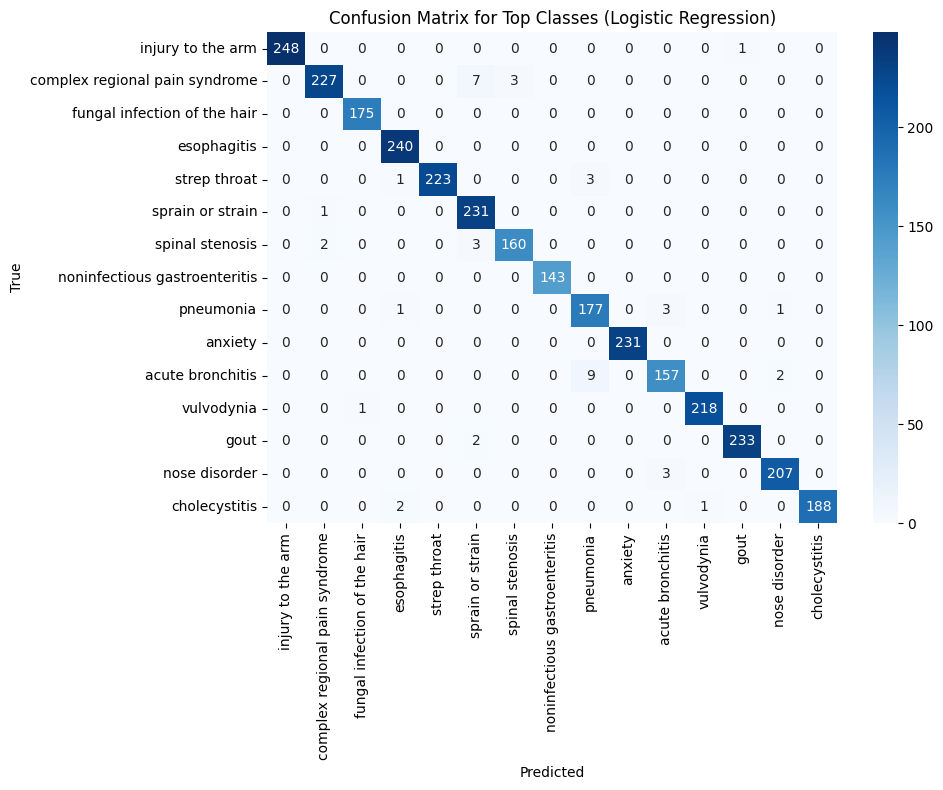

In [22]:
# Create a confusion matrix visualization for Logistic Regression
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)

# We'll use a subset of labels if there are too many classes
num_classes = min(15, len(np.unique(y_test)))  # Limit to top 15 classes for visibility
top_classes_indices = y_test.value_counts().nlargest(num_classes).index

# Filter confusion matrix for top classes
mask = np.isin(y_test, top_classes_indices)
cm_subset = confusion_matrix(
    y_test[mask], 
    y_pred[mask], 
    labels=top_classes_indices
)

# Get class names for the labels
class_names = [le.inverse_transform([idx])[0] for idx in top_classes_indices]

# Plot the confusion matrix
sns.heatmap(cm_subset, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Top Classes (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()